# 2023- 2 KECE470: PATTERN RECOGNITION
# Homework #3:  Logistic Regression

NAME: 서자영                  
ID: 2020130914               
DEPT. 영어영문학과


#**# 1. We want to implement logistic regression using diabetes dataset. Diabetes dataset show the effects of variables such as glucose, blood pressure, skin thickness, etc.**

# 1-a. Load the given datasets (diabetes.csv). And prepare the data for each data by dividing the train and test data by 8:2.



In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score

In [69]:
# build a data frame
data_url = 'https://raw.githubusercontent.com/hcimwtc/ML2022/main/diabetes.csv'
df_dia_original = pd.read_csv(data_url)
df_dia_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
# make a copy of data frame for pre-processing procedure (to prevent contamination)
df_dia = df_dia_original.copy()

In [71]:
#Read the details about the dataset
df_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [72]:
#Count the value of the Outcome
df_dia['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [73]:
'''#Visualise the distribution on the people who have Diabetes
sns.histplot(df_dia['Outcome'])
plt.title('Distribution of people who has / does not have Diabetes')
plt.show()'''

"#Visualise the distribution on the people who have Diabetes\nsns.histplot(df_dia['Outcome'])\nplt.title('Distribution of people who has / does not have Diabetes')\nplt.show()"

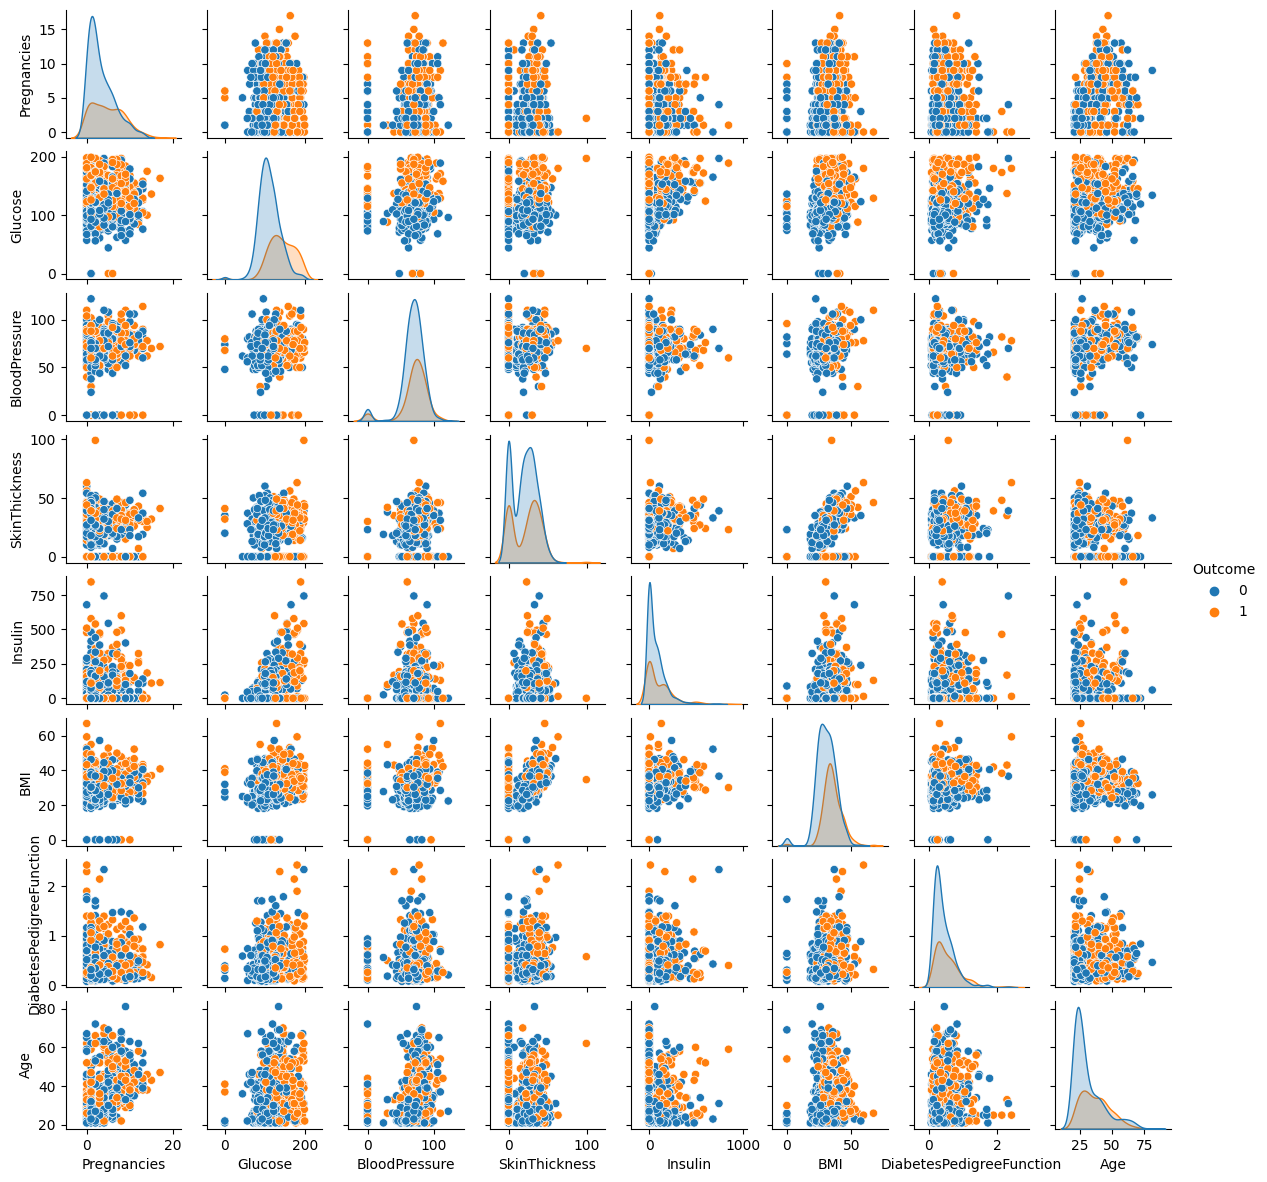

In [74]:
#Visualise the relationship between difference features groups
sns.pairplot(df_dia, hue = 'Outcome', height=1.5)

In [75]:
# evaluate the correlation between columns
df_dia.apply(lambda x: x.factorize()[0]).corr(method='kendall')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.035913,0.031506,-0.003912,-0.064438,-0.059619,-0.022549,0.034659,-0.103233
Glucose,0.035913,1.000000,0.048906,0.066441,0.094689,0.098408,0.114654,0.089965,-0.053811
BloodPressure,0.031506,0.048906,1.000000,0.070406,0.027788,0.038206,0.068977,0.063153,0.036985
SkinThickness,-0.003912,0.066441,0.070406,1.000000,0.342028,0.072319,0.117693,0.004060,0.068100
Insulin,-0.064438,0.094689,0.027788,0.342028,1.000000,0.093383,0.181881,-0.006321,0.029424
BMI,-0.059619,0.098408,0.038206,0.072319,0.093383,1.000000,0.212337,0.046153,0.042027
DiabetesPedigreeFunction,-0.022549,0.114654,0.068977,0.117693,0.181881,0.212337,1.000000,0.028798,0.028599
Age,0.034659,0.089965,0.063153,0.004060,-0.006321,0.046153,0.028798,1.000000,0.001192
Outcome,-0.103233,-0.053811,0.036985,0.068100,0.029424,0.042027,0.028599,0.001192,1.000000


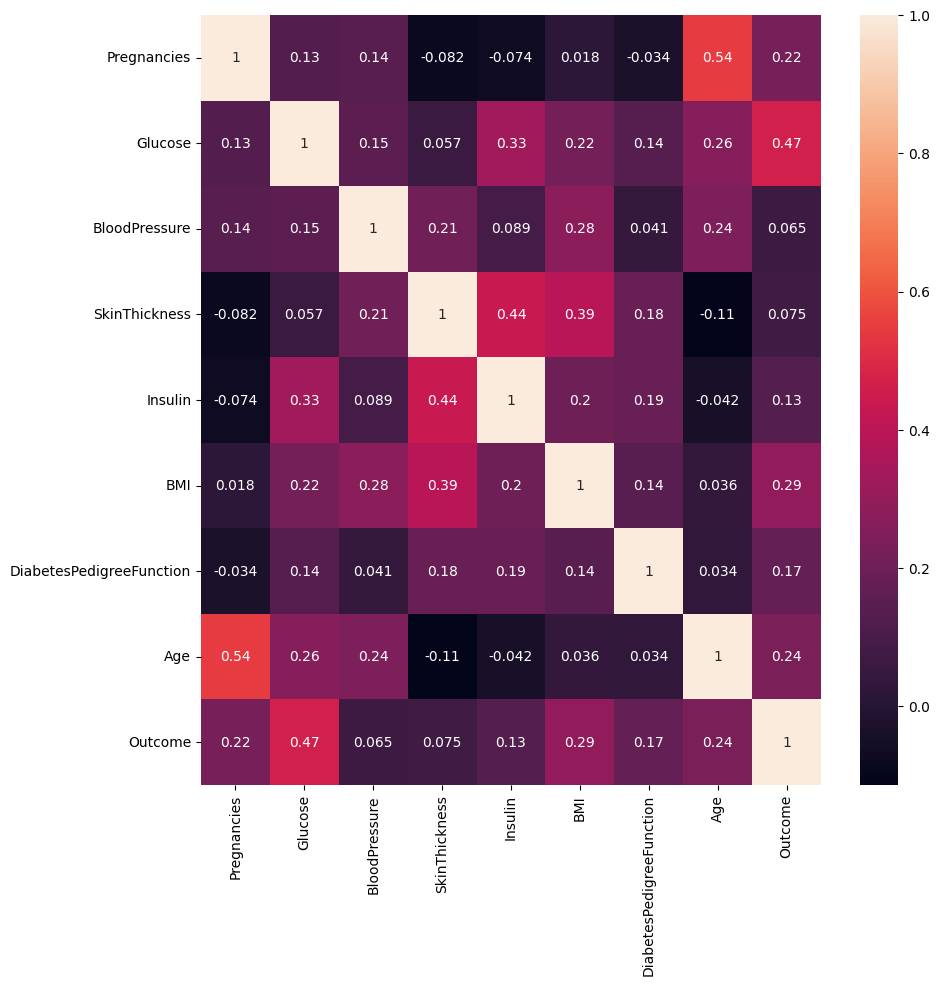

In [76]:
#Viusalise the correlation between columns
plt.figure(figsize=(10,10))
sns.heatmap(df_dia.corr(), annot=True)
plt.show()

In [77]:
#Drop feature - Age b/c it has the lowest correclation
df_dia.drop(columns = ['Age'], inplace=True)

In [78]:
# inspect NAN values in data
df_dia.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

In [88]:
# Define X, y
y = df_dia['Outcome']
X = df_dia.drop("Outcome", axis=1)

In [89]:
# split the dataset into training and testing subsets with a 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# 1-b. Train a model to predict diabetes using training data and logistic regression

In [90]:
# Create a logistic regression model with max iternations set to 300
clf = LogisticRegression(max_iter=300)
# Train the dataset with the above model
clf.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [91]:
y_test_pred=clf.predict(X_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,

# 1-c. Measure test accuracy using test data

In [92]:
#Check the accuracy
print(f'Accuracy without normalization: {accuracy_score(y_test,y_test_pred)}')

Accuracy without normalization: 0.775609756097561


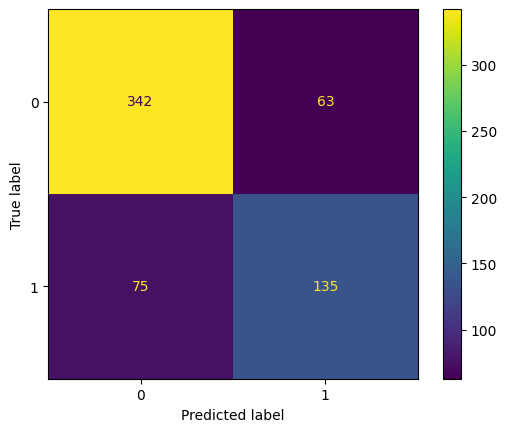

In [93]:
#Print the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix(y_test, y_test_pred)
#Visualise the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

# 2. Add normalization to diabetes prediction problem

2-a. Add normalization to diabetes dataset


In [94]:
# normalize both X_train and X_test data after train-test-split
from sklearn.preprocessing import normalize

X_train_norm = normalize(X_train, norm='l2')
X_test_norm = normalize(X_test, norm='l2')

b. Train a model to predict diabetes using training data and logistic regression

In [137]:
# Create a logistic regression model with max iternations set to 300
clf2 = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter=500)
# Train the dataset with the above model
clf2.fit(X_train_norm, y_train)

LogisticRegression(max_iter=500, penalty='l1', solver='liblinear')

2-c. Measure test accuracy using test data

In [131]:
# Find the test accuracy
y_pred_test = clf2.predict(X_test_norm)
acc_test = accuracy_score(y_test, y_pred_test)
print(f'Test accuracy: {acc_test}')

Test accuracy: 0.6601626016260163


2-d. Compare train accuracy and test accuracy based on normalization

In [136]:
# Find the train accuracy
y_pred_train = clf2.predict(X_train_norm)
acc_train = accuracy_score(y_train, y_pred_train)
print(f'Train accuracy: {acc_train}')

# Compare the two values
print(f"{'>> Train' if acc_train > acc_test else 'Test'} accuracy scores \
better and leads by {(abs(acc_train - acc_test) / acc_train * 100):.2f}%")

Train accuracy: 0.6666666666666666
>> Train accuracy scores better and leads by 0.98%


# 3. Feel free to write about how you can improve model performance in addition to normalization.


```
After the normalization done in Q2, the accuracy decreased from 77% to 66%.
Hence, I think there are alternatives to improve the overall performance.
Some procedure can be done during the data pre-processing stage such as dropping less important columns.

During the training process, the parameter can be adjusted to compare the result. After various attempts,
penalty = None and max_iter of 500 instead of 100 gives the most promising result.
I also tried to useKFold and the highest accuracy can goes up to 81% as shown below (F6)
```





In [ ]:
# train/test split with KFold (K=8)
kf = KFold(n_splits=8, random_state = 1, shuffle=True)
scoreLR = []

# start training and evaluate score
count = 0
for (train_idx, test_idx) in kf.split(X, y):
    count += 1
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model = LogisticRegression(penalty = None, max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f = f1_score(y_true = y_test, y_pred = y_pred, average = 'weighted')
    print('f1 #', count, ': ', f, sep='')

f1 #1: 0.7771426408237431
f1 #2: 0.7745432361406582
f1 #3: 0.7395253555967841
f1 #4: 0.7841510341510342
f1 #5: 0.747181964573269
f1 #6: 0.8184291747888239
f1 #7: 0.7200268817204302
f1 #8: 0.7421875
